# Data Organization
Data Organization plays a very major role in data science almost all the real world problems spend 60% of time on organizing the data where as extracting the data eats out 19% of time says an harvard study.

__Data organization is the cycle of 4 below steps__
1. Exploratory data Analysis 
2. Data munging 
3. Feature Engineering
4. Advanced vizualization

All these above steps are followed until we get a clear picture of structured data from the raw data 

__In this python note book let us concentarte on Exploratory data Analysis, which involves in undertanding the structure of data and find out if there are any missing values, outliers and such kind of impotencies in data and find the pattrens in the data__

# Numpy and Pandas

__Numpy is very efficient  scientific library of python which is used to deal with homogeneous data types like arrays, this tool is pretty much used to work efficeiently on multi dimensional arrays and matrices__

Since numpy only deals with homogenous data and real world will surely have a heterogenous data which is mixture of both numerical and categorical data, we need a library called as pandas which is built on numpy frame work but efficiently handles data tabular structures(pandas data frames)

- Rows - Observations
- Columns- Features 

__Pandas also collabrates with another famous library Matplotlib that is built on the same stucture frame__

# Exploratory Data Analysis(EDA)
__This is the first step that we need to do after inporting the data from any of the source, First to know about the data we need to know the basic structure of the data like :
<br> How many rows and Columns in the data and thier data types, Explore head and tail of the dataset.__

In [236]:
#Import Different libraries needed for EDA

import pandas as pd
import numpy as np
import os


## Import data 

In [237]:
# print (os.getcwd()) # Prints the working directory
os.chdir(r'S:\ML_Datasets') # Provide the path here
print (os.getcwd()) # Prints the working directory
raw_data_path=os.getcwd()

S:\ML_Datasets


In [238]:
#Setting up paths of train and test data sets 
train_file_path = os.path.join(raw_data_path, 'train_titanic.csv')

print(train_file_path)

S:\ML_Datasets\train_titanic.csv


In [239]:
# read the data with all default parameters
titanic_df = pd.read_csv(train_file_path, index_col='PassengerId')
# get the type
type(titanic_df)

pandas.core.frame.DataFrame

## Understanding Basic Structure of data 

In [240]:
# use .info() to get brief information about the dataframe like columns, non-null observations and also,
# data type of each feature
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [241]:
# use .head() to get top 5 rows
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [242]:
# use .head(n) to get top-n rows
titanic_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [243]:
# use .tail() to get last 5 rows
titanic_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Selection, indexing and filtering using pandas

In [244]:
# column selection using dot
titanic_df.Name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [245]:
# selection using column name as string
titanic_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [246]:
# selecting multiple columns using a list of column name strings
titanic_df[['Name','Age']]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
...,...,...
887,"Montvila, Rev. Juozas",27.0
888,"Graham, Miss. Margaret Edith",19.0
889,"Johnston, Miss. Catherine Helen ""Carrie""",NaN


In [247]:
# indexing : use loc for label based indexing 
# all columns  from 5th to 10th row 
titanic_df.loc[5:10,]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [248]:
# selecting column range
titanic_df.loc[5:10, 'Age' : 'Pclass']

""
PassengerId
5
6
7
8
9
10


In [249]:
# selecting discrete columns
titanic_df.loc[5:10, ['Survived', 'Fare','Embarked']]

,Survived,Fare,Embarked
PassengerId,,,
5,0,8.0500,S
6,0,8.4583,Q
7,0,51.8625,S
8,0,21.0750,S
9,1,11.1333,S
10,1,30.0708,C


In [250]:
# indexing : use iloc for position based indexing 
titanic_df.iloc[5:10, 3:8]

,Sex,Age,SibSp,Parch,Ticket
PassengerId,,,,,
6,male,NaN,0,0,330877
7,male,54.0,0,0,17463
8,male,2.0,3,1,349909
9,female,27.0,0,2,347742
10,female,14.0,1,0,237736


In [251]:
# filter rows based on the condition 
male_passengers = titanic_df.loc[titanic_df.Sex == 'male',:]
print('Number of male passengers : {0}'.format(len(male_passengers)))

# use & or | operators to build complex logic
male_passengers_first_class = titanic_df.loc[((titanic_df.Sex == 'male') & (titanic_df.Pclass == 1)),:]
print('Number of male passengers in first class: {0}'.format(len(male_passengers_first_class)))

Number of male passengers : 577
Number of male passengers in first class: 122


In [252]:
# use .describe() to get statistics for all numeric columns
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [253]:
# numerical feature
# centrality measures
print('Mean fare : {0}'.format(titanic_df.Fare.mean())) # mean
print('Median fare : {0}'.format(titanic_df.Fare.median())) # median

Mean fare : 32.2042079685746
Median fare : 14.4542


In [254]:
# dispersion measures
print('Min fare : {0}'.format(titanic_df.Fare.min())) # minimum
print('Max fare : {0}'.format(titanic_df.Fare.max())) # maximum
print('Fare range : {0}'.format(titanic_df.Fare.max()  - titanic_df.Fare.min())) # range
print('25 percentile : {0}'.format(titanic_df.Fare.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(titanic_df.Fare.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(titanic_df.Fare.quantile(.75))) # 75 percentile
print('Variance fare : {0}'.format(titanic_df.Fare.var())) # variance
print('Standard deviation fare : {0}'.format(titanic_df.Fare.std())) # standard deviation

Min fare : 0.0
Max fare : 512.3292
Fare range : 512.3292
25 percentile : 7.9104
50 percentile : 14.4542
75 percentile : 31.0
Variance fare : 2469.436845743117
Standard deviation fare : 49.693428597180905


In [255]:
%matplotlib inline
import matplotlib.pyplot as plt

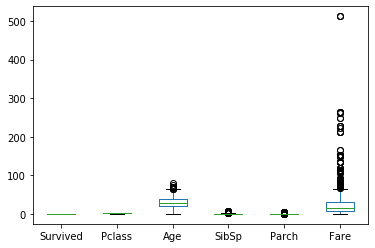

In [256]:
# box-whisker plot
titanic_df.plot(kind='box')
plt.show()

In [257]:
# use .describe(include='all') to get statistics for all  columns including non-numeric ones
titanic_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Adams, Mr. John",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [258]:
# categorical column : Counts
titanic_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [259]:
# categorical column : Proprotions
titanic_df.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [260]:
# apply on other columns
titanic_df.Survived.value_counts() 

0    549
1    342
Name: Survived, dtype: int64

In [261]:
# count : Passenger class
titanic_df.Pclass.value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64

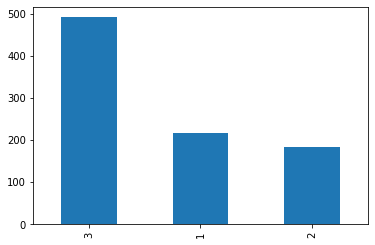

In [262]:
# visualize counts
titanic_df.Pclass.value_counts().plot(kind='bar')

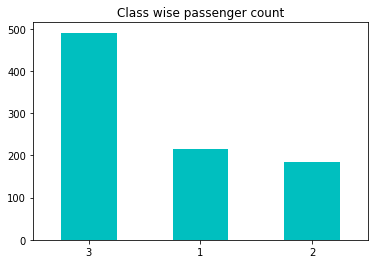

In [263]:
# title : to set title, color : to set color,  rot : to rotate labels 
titanic_df.Pclass.value_counts().plot(kind='bar',rot = 0, title='Class wise passenger count', color='c');

# Distributions 

__There are three kinds of Distributions that we can represent through our vizualizations__
1. Univariate- Which involves with single feature (histograms and Kernal Density Estimation)
2. Bivariate- Which involves in 2 features (Scatter plots)

__Histograms are the plots that represent feature representaion in form of bins using the data, and plot bins on x-axis and frequency on y-axis__

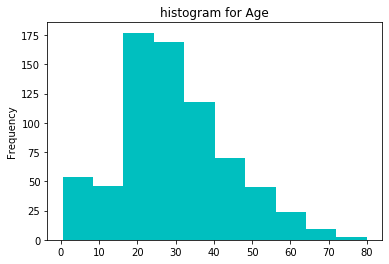

In [264]:
# use hist to create histogram
titanic_df.Age.plot(kind='hist', title='histogram for Age', color='c');

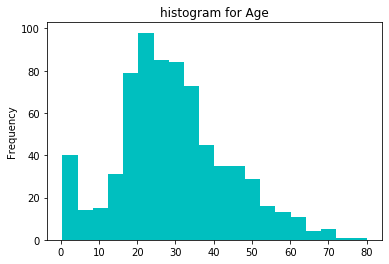

In [265]:
# use bins to add or remove bins
titanic_df.Age.plot(kind='hist', title='histogram for Age', color='c', bins=20);

__KDE plot is nothing but the plot of probablity distribution, instead of frequency we plot the probablity on the y-axis .__

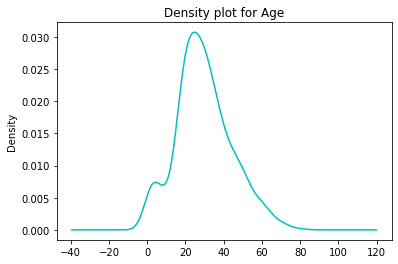

In [266]:
# use kde for density plot
titanic_df.Age.plot(kind='kde', title='Density plot for Age', color='c');

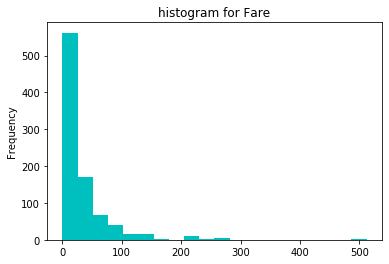

In [267]:
# histogram for fare
titanic_df.Fare.plot(kind='hist', title='histogram for Fare', color='c', bins=20);

In [268]:
print('skewness for age : {0:.2f}'.format(titanic_df.Age.skew()))
print('skewness for fare : {0:.2f}'.format(titanic_df.Fare.skew()))

skewness for age : 0.39
skewness for fare : 4.79


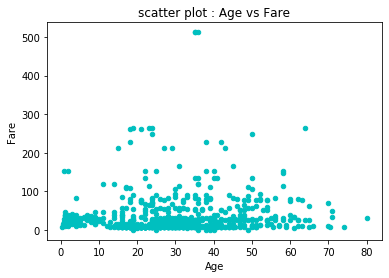

In [269]:
# use scatter plot for bi-variate distribution
titanic_df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare');

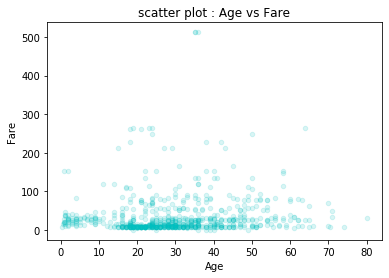

In [270]:
# use alpha to set the transparency
titanic_df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare', alpha=0.15);

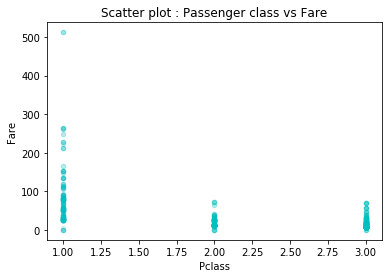

In [271]:
titanic_df.plot.scatter(x='Pclass', y='Fare', color='c', title='Scatter plot : Passenger class vs Fare', alpha=0.15);

## Grouping and Aggregations
__Grouping is one more important thing to look into, its like dividing the feature list into different groups, we can either use it on single feature or multiple features.__

In [272]:
# group by sex and get the meadian of Age feature for each group 
titanic_df.groupby('Sex').Age.median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [273]:
# group by passenger class and get the mean fare of each group
titanic_df.groupby(['Pclass']).Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [274]:
titanic_df.groupby(['Pclass'])[['Fare','Age']].median()

,Fare,Age
Pclass,,
1,60.2875,37.0
2,14.2500,29.0
3,8.0500,24.0


In [275]:
titanic_df.groupby(['Pclass']).agg({'Fare' : 'mean', 'Age' : 'median'})

,Fare,Age
Pclass,,
1,84.154687,37.0
2,20.662183,29.0
3,13.675550,24.0


In [276]:
# more complicated aggregations 
aggregations = {
    'Fare': { # work on the "Fare" column
        'mean_Fare': 'mean',  # get the mean fare
        'median_Fare': 'median', # get median fare
        'max_Fare': max,
        'min_Fare': np.min
    },
    'Age': {     # work on the "Age" column
        'median_Age': 'median',   # Find the max, call the result "max_date"
        'min_Age': min,
        'max_Age': max,
        'range_Age': lambda x: max(x) - min(x)  # Calculate the age range per group
    }
}
print (aggregations)

{'Fare': {'mean_Fare': 'mean', 'median_Fare': 'median', 'max_Fare': <built-in function max>, 'min_Fare': <function amin at 0x00000199B3D5D9D8>}, 'Age': {'median_Age': 'median', 'min_Age': <built-in function min>, 'max_Age': <built-in function max>, 'range_Age': <function <lambda> at 0x00000199B91B63A8>}}


In [277]:
titanic_df.groupby(['Pclass']).agg(mean_Fare=('Fare', 'mean'), x = ("Fare",'median'), new_grouping_name=('Fare', 'max'))

,mean_Fare,x,new_grouping_name
Pclass,,,
1,84.154687,60.2875,512.3292
2,20.662183,14.2500,73.5000
3,13.675550,8.0500,69.5500


In [278]:
# titanic_df.groupby(['Pclass']).agg(aggregations)

In [279]:
titanic_df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

## Crosstab
__Cross tabs help us to understand about the realations between two are more categorical data .__

In [280]:
# crosstab on Sex and Pclass
pd.crosstab(titanic_df.Sex, titanic_df.Pclass)

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


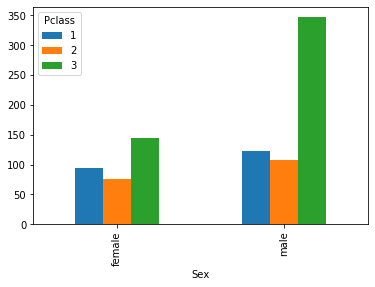

In [281]:
pd.crosstab(titanic_df.Sex, titanic_df.Pclass).plot(kind='bar');

## Pivot Tables 
__Pivot tables are natural extencions of the cross tabs, with the use of pivot tables we can get the information of any summary stat of a new feature by grouping them with other two, so here in the pivot tables we have to mention the main groupby features and then the feature that you are intrested in, with its aggregate function.__

In [282]:
# pivot table
titanic_df.pivot_table(index='Sex',columns = 'Pclass',values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [283]:
titanic_df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [284]:
titanic_df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


## Data Munging : 
### Datamunging is the process where we fix the potential issues of the data set and make the dataset fully ready for the further processing 
__Most common issues that occur in data is:__
1. Missing values and 2. Outliers 

## Working with missing values
__Missing values can occur by any of this issue like observation of that purticular feature may be missing or not recorded. These missing values could make diffrence in the accuracies of your building model and also deterministic mistakes in decision making if you doesnt handle these values.__

__Ways of getting rid of missing values,__
1. Deleting the observation or feature, according to the data missing %
2. Imputation(Replacing some values)

In [285]:
# use .info() to detect missing values (if any)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [286]:
# extract rows with Embarked as Null
titanic_df[titanic_df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## Missing value imputation:
__Imputation is nothing but inserting some other value instead of original missing value, some of the techniques are given below:__<br><br>
__1. Mean Imputation 2. Median Imputation 3. Mode imputation(For categorical)__<br><br>
These three things mentioned above are very staright forward and easy but there are more complicated methodologies as well, where you can use some predictive models for this imputations like KNN, some times you may also use techniques like backward fill and forward fill 


In [287]:
# how many people embarked at different points
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [288]:
# which embarked point has higher survival count
pd.crosstab(titanic_df.Survived, titanic_df.Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [289]:
# impute the missing values with 'S'
# df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
# df.Embarked.fillna('S', inplace=True)
#inplace= True means the actual data frame will be replaced, if false then a new copy will be made out of old

In [290]:
# Option 2 : explore the fare of each class for each embarkment point
titanic_df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [291]:
# replace the missing values with 'C'
titanic_df.Embarked.fillna('C', inplace=True)

In [292]:
# check if any null value remaining
titanic_df[titanic_df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [293]:
# check info again
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


## Teart missing values for feature Fare 

In [294]:
titanic_df[titanic_df.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [295]:
median_fare = titanic_df.loc[(titanic_df.Pclass == 3) & (titanic_df.Embarked == 'S')  & (titanic_df.Sex == 'male'),'Fare'].median()
print (median_fare)

8.05


In [296]:
#impute the value 
titanic_df.Fare.fillna(median_fare, inplace=True)

In [297]:
# check info again
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [298]:
# set maximum number of rows to be displayed
pd.options.display.max_rows = 15

In [299]:
titanic_df[titanic_df.Age.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


### option 1 : replace all missing age with mean value

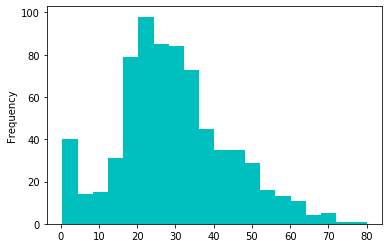

In [300]:
titanic_df.Age.plot(kind='hist', bins=20, color='c');

In [301]:
# get mean
titanic_df.Age.mean()

29.69911764705882

In [302]:
# replace the missing values
# df.Age.fillna(df.Age.mean(), inplace=True)

### option 2 : replace with median age of gender

In [303]:
# median values
titanic_df.groupby('Sex').Age.median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

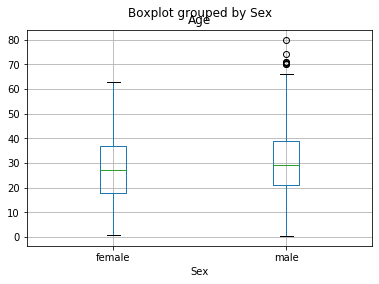

In [304]:
# visualize using boxplot
titanic_df[titanic_df.Age.notnull()].boxplot('Age','Sex');

In [305]:
# replace the data with median: 
age_sex_median = titanic_df.groupby('Sex').Age.transform('median')
print(age_sex_median)
# titanic_df.Age.fillna(age_sex_median, inplace=True)

PassengerId
1      29.0
2      27.0
3      27.0
4      27.0
5      29.0
       ... 
887    29.0
888    27.0
889    27.0
890    29.0
891    29.0
Name: Age, Length: 891, dtype: float64


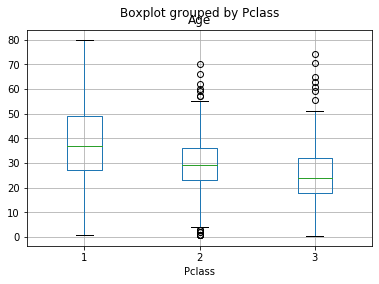

In [306]:
# option 3 : replace with median age of Pclass
titanic_df[titanic_df.Age.notnull()].boxplot('Age','Pclass');

In [307]:
# replace : 
# pclass_age_median = df.groupby('Pclass').Age.transform('median')
# titanic_df.Age.fillna(pclass_age_median , inplace=True)

In [308]:
titanic_df.Name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [309]:
# option 4 : replace with median age of title
# Function to extract the title from the name 
def GetTitle(name):
    first_name_with_title = name.split(',')[1]  #gets the second part of the name after ','
    title = first_name_with_title.split('.')[0] #gets the first part of name before '.'
    title = title.strip().lower()      #Strip function helps us to remove leading and trailing white spaces        
    return title
string=' xldsl '
print(string.strip())

xldsl


In [310]:
# use map function to apply the function on each Name value row i
titanic_df.Name.map(lambda x : GetTitle(x)) # alternatively you can use : titanic_df.Name.map(GetTitle)

PassengerId
1        mr
2       mrs
3      miss
4       mrs
5        mr
       ... 
887     rev
888    miss
889    miss
890      mr
891      mr
Name: Name, Length: 891, dtype: object

In [311]:
titanic_df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer'], dtype=object)

In [312]:
#Slightly changing the gettitle function to bin values 
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [313]:
# create Title feature
titanic_df['Title'] =  titanic_df.Name.map(lambda x : GetTitle(x))

In [314]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


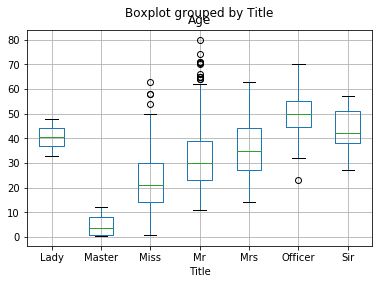

In [315]:
# Box plot of Age with title
titanic_df[titanic_df.Age.notnull()].boxplot('Age','Title');

In [316]:
# replace missing values
title_age_median = titanic_df.groupby('Title').Age.transform('median')
titanic_df.Age.fillna(title_age_median , inplace=True)

In [317]:
# check info again
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Title     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 130.5+ KB


## Working with outliers
__Outliers may impact your analysis to be biased, so we need to do work on outliers__<br>
__Visual tools like histogram, box plots and scatter plots can help you visualising the outliers__<br>
__We can either remove them, transform them using log values or sqrt of them,  binning them or imputation__

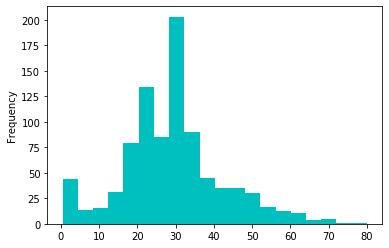

In [318]:
# use histogram to get understand the distribution
titanic_df.Age.plot(kind='hist', bins=20, color='c');

In [319]:
titanic_df.loc[titanic_df.Age > 70]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Mr
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,Mr
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Mr
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,Mr
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,Mr


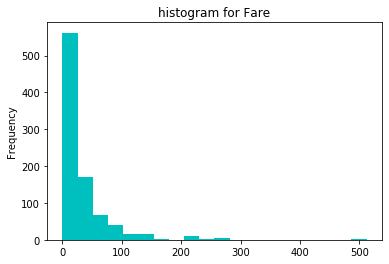

In [320]:
# histogram for fare
titanic_df.Fare.plot(kind='hist', title='histogram for Fare', bins=20, color='c');

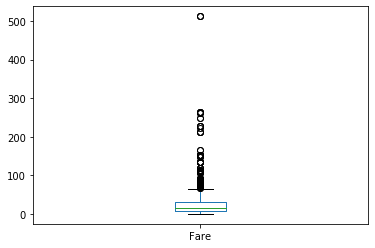

In [321]:
# box plot to indentify outliers 
titanic_df.Fare.plot(kind='box');

In [322]:
# look into the outliers
titanic_df.loc[titanic_df.Fare == titanic_df.Fare.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr


In [323]:
# Try some transformations to reduce the skewness
LogFare = np.log(titanic_df.Fare + 1.0) # Adding 1 to accomodate zero fares : log(0) is not defined

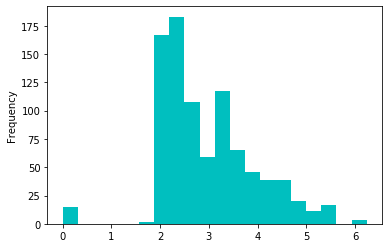

In [324]:
# Histogram of LogFare
LogFare.plot(kind='hist', color='c', bins=20);

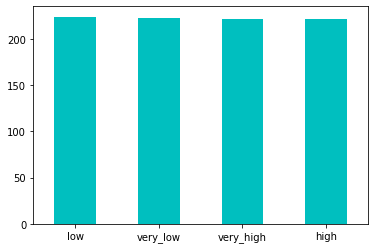

In [325]:
pd.qcut(titanic_df.Fare, 4, labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar', color='c', rot=0);

In [326]:
# create fare bin feature
titanic_df['Fare_Bin'] = pd.qcut(titanic_df.Fare, 4, labels=['very_low','low','high','very_high'])

## Feature Engineering

__Process of transforming the raw data to better representative features in order to create better predictive models__

__This can be done in many ways__ 
- __Transform the data__ : we can use log, square, square root and many types of transformations for a feature to make it better
- __Creation of new feature__ : This can be one of the great helpful thing when you have much domain expertice.
- __Selection of features__ : select only those features which are required for the model, since our models with more feaures penalizes for the each new feature added 

In [327]:
# AgeState based on Age
titanic_df['AgeState'] = np.where(titanic_df['Age'] >= 18, 'Adult','Child')
#Where function in numpy will be very helpful i generating features, this takes 3 argumensts first one will take an equation 
#and returns the second argument if the equation is true else the third argument would be returned

In [328]:
#Check for the counts 
titanic_df.AgeState.value_counts()

Adult    774
Child    117
Name: AgeState, dtype: int64

In [329]:
# crosstab to check the surviaval data against the age state
pd.crosstab(titanic_df.Survived, titanic_df.AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


### Feature:Family size

In [330]:
# Family : Adding Parents with Siblings
titanic_df['FamilySize'] = titanic_df.Parch + titanic_df.SibSp + 1 # 1 for self

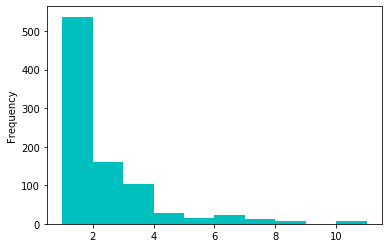

In [331]:
# explore the family feature
titanic_df['FamilySize'].plot(kind='hist', color='c');

In [332]:
# further explore this family with max family members
titanic_df.loc[titanic_df.FamilySize == titanic_df.FamilySize.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin,AgeState,FamilySize
PassengerId,,,,,,,,,,,,,,,
160,0,3,"Sage, Master. Thomas Henry",male,3.5,8,2,CA. 2343,69.55,NaN,S,Master,very_high,Child,11
181,0,3,"Sage, Miss. Constance Gladys",female,21.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,Adult,11
202,0,3,"Sage, Mr. Frederick",male,30.0,8,2,CA. 2343,69.55,NaN,S,Mr,very_high,Adult,11
325,0,3,"Sage, Mr. George John Jr",male,30.0,8,2,CA. 2343,69.55,NaN,S,Mr,very_high,Adult,11
793,0,3,"Sage, Miss. Stella Anna",female,21.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,Adult,11
847,0,3,"Sage, Mr. Douglas Bullen",male,30.0,8,2,CA. 2343,69.55,NaN,S,Mr,very_high,Adult,11
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,21.0,8,2,CA. 2343,69.55,NaN,S,Miss,very_high,Adult,11


In [333]:
pd.crosstab(titanic_df.Survived, titanic_df.FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


### Feature: IsMother

In [334]:
# a lady aged more thana 18 who has Parch >0 and is married (not Miss)
titanic_df['IsMother'] = np.where(((titanic_df.Sex == 'female') & (titanic_df.Parch > 0) & (titanic_df.Age > 18) ), 1, 0)

### Deck

In [335]:
# explore Cabin values
titanic_df.Cabin

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

In [336]:
# use unique to get unique values for Cabin feature
titanic_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [337]:
# look at the Cabin = T

titanic_df.loc[titanic_df.Cabin == 'T']


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,Mr,very_high,Adult,1,0


In [338]:
# set the value to NaN
titanic_df.loc[titanic_df.Cabin == 'T', 'Cabin'] = np.NaN

In [339]:
# look at the unique values of Cabin again
titanic_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [340]:
# extract first character of Cabin string to the deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
titanic_df['Deck'] = titanic_df['Cabin'].map(lambda x : get_deck(x))

In [341]:
# check counts
titanic_df.Deck.value_counts()

Z    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: Deck, dtype: int64

In [342]:
# use crosstab to look into survived feature cabin wise
pd.crosstab(titanic_df.Survived, titanic_df.Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


### Categorical Feature Encoding

__Categorical values may be very nice to understand by naked eye, but many of the machine learning algorithms cannot process strings or alphabets as thier inputs, so we need to convert those things before performing ML algorithm on data .__

__This encoding is nothing but converting these categorical into some form of integer, there diffrent methods to achive this__

1. __Binary Encoding__ : converting a categorical variable to either 0 or 1, this can be only use when the catergorical data has only two types of classes 

In [343]:
# sex
titanic_df['IsMale'] = np.where(titanic_df.Sex == 'male', 1, 0)

2. __Level Encoding__ : This is used when you have multiple categories in the data, we basically convert classes to different integers, This can be useful only when we know the levels of categorical variable. if we dont know the levels of those, then we can use a new type called as one hot encoding.

3. __One hot Encoding__: This would create as many number of features as per the categories

In [344]:
# columns Deck, Pclass, Title, AgeState
titanic_df.info()
titanic_df = pd.get_dummies(titanic_df,columns=['Deck', 'Pclass', 'Embarked','AgeState'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Ticket      891 non-null    object  
 8   Fare        891 non-null    float64 
 9   Cabin       203 non-null    object  
 10  Embarked    891 non-null    object  
 11  Title       891 non-null    object  
 12  Fare_Bin    891 non-null    category
 13  AgeState    891 non-null    object  
 14  FamilySize  891 non-null    int64   
 15  IsMother    891 non-null    int32   
 16  Deck        891 non-null    object  
 17  IsMale      891 non-null    int32   
dtypes: category(1), float64(2), int32(2), int64(5), ob

In [345]:
# drop columns
titanic_df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1, inplace=True)

In [346]:
# reorder columns
columns = [column for column in titanic_df.columns if column != 'Survived']
columns = ['Survived'] + columns
titanic_df = titanic_df[columns]

In [347]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Survived        891 non-null    int64   
 1   Age             891 non-null    float64 
 2   Fare            891 non-null    float64 
 3   Title           891 non-null    object  
 4   Fare_Bin        891 non-null    category
 5   FamilySize      891 non-null    int64   
 6   IsMother        891 non-null    int32   
 7   IsMale          891 non-null    int32   
 8   Deck_A          891 non-null    uint8   
 9   Deck_B          891 non-null    uint8   
 10  Deck_C          891 non-null    uint8   
 11  Deck_D          891 non-null    uint8   
 12  Deck_E          891 non-null    uint8   
 13  Deck_F          891 non-null    uint8   
 14  Deck_G          891 non-null    uint8   
 15  Deck_Z          891 non-null    uint8   
 16  Pclass_1        891 non-null    uint8   
 17  Pclass_2        